In [1]:
%matplotlib inline

import glob
import os

import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 14
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.labelsize'] = 14

In [2]:
from astropy import constants as const
from astropy import units as u

In [3]:
# from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.3, Om0=0.3, name=r'Flat$\Lambda$CDM ($\Omega_M = 0.3$)')

In [44]:
from astropy.cosmology import LambdaCDM
from astropy.cosmology import FlatwCDM 
from astropy.cosmology import Planck15

In [4]:
cosmo.angular_diameter_distance(3.4377) * .673

<Quantity 1063.7144518860152 Mpc>

In [5]:
cosmo.angular_diameter_distance(1.9626) * .673

<Quantity 1210.811882835684 Mpc>

In [6]:
cosmo.angular_diameter_distance_z1z2(3.0, 3.5)

<Quantity 101.74369002479587 Mpc>

In [7]:
dr = abs(cosmo.comoving_distance(3.0) - cosmo.comoving_distance(3.1))

In [8]:
r = 0.5 * abs(cosmo.comoving_distance(3.0) + cosmo.comoving_distance(3.1)) 

In [12]:
one_deg = np.pi / 180

In [13]:
r * one_deg

<Quantity 116.2060142373605 Mpc>

In [14]:
cosmo.comoving_transverse_distance(np.sqrt(3.0*3.1)) * one_deg

<Quantity 116.20665761324183 Mpc>

In [15]:
cosmo.comoving_transverse_distance(3.4377) / 0.63 / 200.0

<Quantity 55.666945247937086 Mpc>

In [16]:
cosmo.comoving_distance(3.5)

<Quantity 7066.947506434304 Mpc>

(0, 0.23010448525169158)

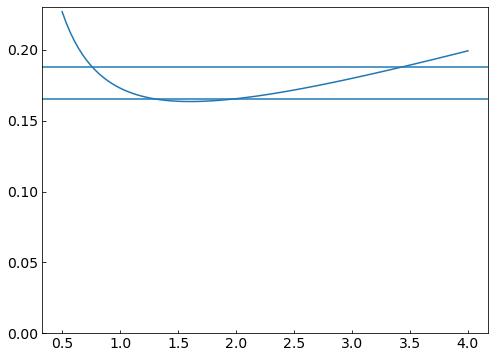

In [17]:
z = np.linspace(.5, 4, 101)
d_A = cosmo.angular_diameter_distance(z).value * .673
plt.plot(z, 200.0/d_A)
plt.axhline(200.0/1210.8119)
plt.axhline(200.0/1063.7145)
plt.ylim(0, None)

In [18]:
rd = 147.49 * u.Mpc

In [19]:
D_M_over_rd_fid = 38.63
D_H_over_rd_fid = 8.744

In [20]:
1294 / rd.value

8.773476167875788

In [21]:
cosmo.H0

<Quantity 67.3 km / (Mpc s)>

In [108]:
def H_to_DH_over_rd(value):
    return float((const.c / (value * u.km / u.Mpc / u.s)).to(u.Mpc) / rd)

In [109]:
(const.c / (78.4 * u.km / u.Mpc / u.s)).to(u.Mpc) / rd

<Quantity 25.92639089332933>

In [128]:
bao_constraints = [
    {
        'name': '6dFGS',
        'source': 'F. Beutler et al., MNRAS 416, 3017 (Oct. 2011), 1106.3366',
        'z': 0.106,
        'D_v/r_d': {
            'value': 3.047,
            'error': 0.137
        },
        'marker': '<'
    },
    {
        'name': 'MGS',
        'source': 'A. J. Ross et al., ArXiv e-prints (2014), 1409.3242.',
        'z': 0.15,
        'D_v/r_d': {
            'value': 4.480,
            'error': 0.168
        },
        'marker': '>'
    },
#     {
#         'name': 'BOSS LOWZ Sample',
#         'source': 'L. Anderson et al., MNRAS 441, 24 (Jun. 2014), 1312.4877.',
#         'z': 0.32,
#         'D_v/r_d': {
#             'value': 8.467,
#             'error': 0.167
#         },
#         'marker': 'o'
#     },
    {
        'name': 'BOSS LOWZ Sample',
        'source': 'Alam et al. 2016',
        'z': 0.32,
        'D_v/r_d': {
            'value': 1270. / rd.value,
            'error': 14. / rd.value
        },
        'D_M/r_d': {
            'value': 1294 / rd.value,
            'error': 21. / rd.value
        },
        'D_H/r_d': {
            'value': H_to_DH_over_rd(78.4),
            'error': 2.3/78.4 * H_to_DH_over_rd(78.4)
        },
        'marker': '^'
    },
#     {
#         'name': 'BOSS CMASS Sample',
#         'source': 'L. Anderson et al., MNRAS 441, 24 (Jun. 2014), 1312.4877.',
#         'z': 0.57,
#         'D_M/r_d': {
#             'value': 14.945,
#             'error':  0.210
#         },
#         'D_H/r_d': {
#             'value': 20.75,
#             'error':  0.73
#         },
#         'r_off': -0.52,
#         'marker': 'o'
#     },
    {
        'name': 'BOSS CMASS Sample',
        'source': 'Alam et al. 2016',
        'z': 0.57,
        'D_v/r_d': {
            'value': 2033. / rd.value,
            'error': 21. / rd.value
        },
        'D_M/r_d': {
            'value': 2179 / rd.value,
            'error': 35. / rd.value
        },
        'D_H/r_d': {
            'value': H_to_DH_over_rd(96.6),
            'error': 2.4/96.6 * H_to_DH_over_rd(96.6)
        },
        'r_off': -0.52, # reused from Anderson 2014
        'marker': 'd'
    },
#     {
#         'name': 'LyaF auto-correlation',
#         'source': 'T. Delubac et al., ArXiv e-prints (Apr. 2014), 1404.1801.',
#         'z': 2.34,
#         'D_M/r_d': {
#             'value': 37.675,
#             'error':  2.171
#         },
#         'D_H/r_d': {
#             'value': 9.18,
#             'error': 0.28
#         },
#         'r_off': -0.43,
#         'marker': 'o'
#     },
    {
        'name': 'LyaF auto-correlation',
        'source': 'Bautista et al 2017',
        'z': 2.33,
        'D_M/r_d': {
            'value': 37.77,
            'error':  2.13
        },
        'D_H/r_d': {
            'value': 9.07,
            'error': 0.31
        },
        'r_off': -0.43, # reusing r_off from Delubac 14
        'marker': 'o'
    },
    {
        'name': 'LyaF-QSO cross-correlation',
        'source': 'A. Font-Ribera  et al., JCAP 5, 27, 027 (May 2014), 1311.1767',
        'z': 2.36,
        'D_M/r_d': {
            'value': 36.288,
            'error':  1.344
        },
        'D_H/r_d': {
            'value': 9.00,
            'error': 0.30
        },
        'r_off': -0.39,
        'marker': '*'
    },
    {
        'name': 'Combined LyaF',
        'source': 'A. Font-Ribera  et al., JCAP 5, 27, 027 (May 2014), 1311.1767',
        'z': 2.34,
        'D_M/r_d': {
            'value': 36.489,
            'error':  1.152
        },
        'D_H/r_d': {
            'value': 9.145,
            'error': 0.204
        },
        'r_off': -0.48,
        'marker': 'h'
    },
    {
        'name': 'SNIa + BAO',
        'source': 'Aubourg 2015',
        'z': 0,
        'D_M/r_d': {
            'value': float(const.c/cosmo.H0/rd),
            'error': 1.1/cosmo.H0.value*float(const.c/cosmo.H0/rd)
        },
        'D_H/r_d': {
            'value': float(const.c/cosmo.H0/rd),
            'error': 1.1/cosmo.H0.value*float(const.c/cosmo.H0/rd)
        },
        'marker': 's'
    },
    {
        'name': 'Margala',
        'source': 'Margala 2017',
        'z': 2.32,
        'D_M/r_d': {
            'value': 1.00111*D_M_over_rd_fid,
            'error': 0.179013*D_M_over_rd_fid
        },
        'D_H/r_d': {
            'value': 1.01435*D_H_over_rd_fid,
            'error': 0.0448015*D_H_over_rd_fid
        },
        'marker': 'v'
    },
#     {
#         'name': 'Margala',
#         'source': 'Margala 2017',
#         'z': 2.33,
#         'D_M/r_d': {
#             'value': 0.98563*D_M_over_rd_fid,
#             'error': 0.182472*D_M_over_rd_fid
#         },
#         'D_H/r_d': {
#             'value': 1.01953*D_H_over_rd_fid,
#             'error': 0.0483951*D_H_over_rd_fid
#         },
#         'marker': '^'
#     },
    
]

In [129]:
for bao_constraint in bao_constraints:
    cells = ['{:30s}'.format(bao_constraint['name']), '${:<5s}$'.format(str(bao_constraint['z']))]
    for distance in ('D_v/r_d', 'D_M/r_d', 'D_H/r_d'):
        if distance in bao_constraint:
            result = bao_constraint[distance]
            cells.append('${:8.4f} \pm {:8.4f}$'.format(result['value'], result['error']))
        else:
            cells.append('{:^23s}'.format('-'))
    print '  &  '.join(cells)

6dFGS                           &  $0.106$  &  $  3.0470 \pm   0.1370$  &             -             &             -           
MGS                             &  $0.15 $  &  $  4.4800 \pm   0.1680$  &             -             &             -           
BOSS LOWZ Sample                &  $0.32 $  &  $  8.6108 \pm   0.0949$  &  $  8.7735 \pm   0.1424$  &  $ 25.9264 \pm   0.7606$
BOSS CMASS Sample               &  $0.57 $  &  $ 13.7840 \pm   0.1424$  &  $ 14.7739 \pm   0.2373$  &  $ 21.0417 \pm   0.5228$
LyaF auto-correlation           &  $2.33 $  &             -             &  $ 37.7700 \pm   2.1300$  &  $  9.0700 \pm   0.3100$
LyaF-QSO cross-correlation      &  $2.36 $  &             -             &  $ 36.2880 \pm   1.3440$  &  $  9.0000 \pm   0.3000$
Combined LyaF                   &  $2.34 $  &             -             &  $ 36.4890 \pm   1.1520$  &  $  9.1450 \pm   0.2040$
SNIa + BAO                      &  $0    $  &             -             &  $ 30.2025 \pm   0.4937$  &  $ 30.202

In [130]:
cosmo.H0

<Quantity 67.3 km / (Mpc s)>

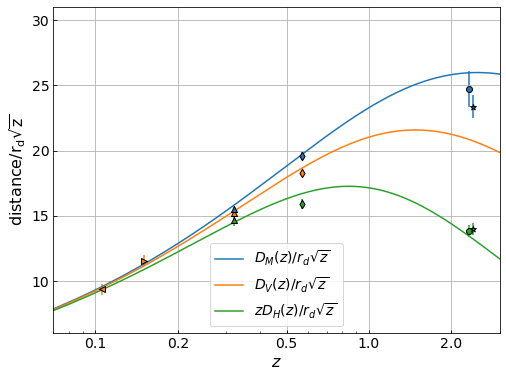

In [140]:
fig, ax = plt.subplots(figsize=(8, 6))

z = np.linspace(0, 4, 1001)[1:]
D_H = (const.c / cosmo.H(z)).to(u.Mpc)
D_M = cosmo.comoving_distance(z).to(u.Mpc)
D_V = np.power(np.power(D_M, 2) * z * D_H, 1.0/3.0)

rd = 147.49 * u.Mpc

ax.plot(z, D_M / (rd * np.sqrt(z)), label=r'$D_M(z)/r_d\sqrt{z}$')
ax.plot(z, D_V / (rd * np.sqrt(z)), label=r'$D_V(z)/r_d\sqrt{z}$')
ax.plot(z, z * D_H / (rd * np.sqrt(z)), label=r'$z D_H(z)/r_d\sqrt{z}$')


for bao_constraint in bao_constraints:
    if 'D_v/r_d' in bao_constraint:
        if bao_constraint['name'] in ('Margala', 'Combined LyaF'):
            continue
        result = bao_constraint['D_v/r_d']
        z = bao_constraint['z']
        y = result['value'] / np.sqrt(z)
        yerr = result['error'] / np.sqrt(z)
        p = ax.scatter(z, y, marker=bao_constraint['marker'], color='C1', edgecolors='k', zorder=9)
        color = p.get_facecolor()[0]
        ax.vlines(z, y-yerr, y+yerr, color=color, zorder=0)
        
for bao_constraint in bao_constraints:
    if 'D_M/r_d' in bao_constraint and bao_constraint['z'] > 0:
        if bao_constraint['name'] in ('Margala', 'Combined LyaF'):
            continue
        result = bao_constraint['D_M/r_d']
        z = bao_constraint['z']
        if 'cross' in bao_constraint['name']:
            z += 0.05
        y = result['value'] / np.sqrt(z)
        yerr = result['error'] / np.sqrt(z)
        p = ax.scatter(z, y, marker=bao_constraint['marker'], color='C0', edgecolors='k', zorder=9)
        color = p.get_facecolor()[0]
        ax.vlines(z, y-yerr, y+yerr, color=color, zorder=0)
        
for bao_constraint in bao_constraints:
    if 'D_H/r_d' in bao_constraint and bao_constraint['z'] > 0:
        if bao_constraint['name'] in ('Margala', 'Combined LyaF'):
            continue
        result = bao_constraint['D_H/r_d']
        z = bao_constraint['z']
        if 'cross' in bao_constraint['name']:
            z += 0.05
        y = np.sqrt(z) * result['value']
        yerr = np.sqrt(z) * result['error']
        p = ax.scatter(z, y, marker=bao_constraint['marker'], color='C2', edgecolors='k', zorder=9)
        color = p.get_facecolor()[0]
        ax.vlines(z, y-yerr, y+yerr, color=color, zorder=0)

ax.set_xscale('log')
ax.xaxis.set_major_locator(mticker.LogLocator(subs=(1, 2, 5)))
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

ax.set_ylim(6, 31)
ax.set_xlim(0.07, 3)

ax.set_xlabel(r'$z$', fontsize=16)
ax.set_ylabel(r'$\rm{distance}/r_d\sqrt{z}$', fontsize=16)

ax.legend(fontsize=14, loc='lower center')
ax.grid(True)

ax.tick_params(direction='in', labelsize=14, which='both')

In [182]:
def distance_adjusty(ax, ylim, label):
    '''distance plot helper for adjusting yaxis'''
    ax.set_ylim(*ylim)
    ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
    ax.set_ylabel(label, fontsize=16)
    
def distance_adjustx(ax, zticks):
    '''distance plot helper for adjusting xaxis'''
    scaled_zticks = np.sqrt(1 + np.array(zticks))
    pad = 0.05*(scaled_zticks[-1] - scaled_zticks[0]) 
    ax.set_xlim(scaled_zticks[0] - pad, scaled_zticks[-1] + pad)
    ax.xaxis.set_ticks(scaled_zticks)
    ax.xaxis.set_ticklabels(zticks)
    ax.set_xlabel('Redshift', fontsize=16)
    
def distance_adjust(ax):
    ax.grid(True)
    ax.tick_params(direction='in', labelsize=14)

def plot_H(ax, zmin=0, zmax=4, npoints=1001, zticks=[3, 2, 1, 0.5, 0], ylim=(55, 76)):
    # plot H(z)/(1+z) vs sqrt(1+z)
    z = np.linspace(zmin, zmax, npoints)[1:]
    scaled_z = np.sqrt(1 + z)
    H = cosmo.H(z)
    ax.plot(scaled_z, (H/(1 + z)), color='black', label=cosmo.name)
    
    omegak_cosmo = LambdaCDM(H0=67.3, Om0=0.3, Ode0=(1 - 0.3 + 0.05), Ob0=Planck15.Ob0,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    H = omegak_cosmo.H(z)
    ax.plot(scaled_z, (H/(1 + z)), color='gray', ls='--', label=r'$o\Lambda$CDM ($\Omega_k = \pm 0.05$)')
    
    omegak_cosmo = LambdaCDM(H0=67.3, Om0=0.3, Ode0=(1 - 0.3 - 0.05), Ob0=Planck15.Ob0,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    H = omegak_cosmo.H(z)
    ax.plot(scaled_z, (H/(1 + z)), color='gray', ls='--')
    
    
    omegaw07_cosmo = FlatwCDM(H0=67.3, Om0=0.3, w0=-0.7,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    H = omegaw07_cosmo.H(z)
    ax.plot(scaled_z, (H/(1 + z)), color='gray', ls=':', label=r'$w$CDM ($1 + w = \pm 0.3$)')
    
    omegaw13_cosmo = FlatwCDM(H0=67.3, Om0=0.3, w0=-1.3,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    H = omegaw13_cosmo.H(z)
    ax.plot(scaled_z, (H/(1 + z)), color='gray', ls=':')
    
    # adjust yaxis 
    distance_adjusty(ax, ylim, '\n'.join([r'$H(z)/(1+z)$', r'$[\rm{km} / \rm{s} / \rm{Mpc}]$']))
    
    # adjust xaxis
    if zticks is not None:
        distance_adjustx(ax, zticks)
    
    # adjust figure
    distance_adjust(ax)


def plot_DM(ax, zmin=0, zmax=4, npoints=1001, zticks=[3, 2, 1, 0.5, 0], ylim=(55, 76)):
    # plot c*log(1+z)/D_M vs sqrt(1+z)
    z = np.linspace(zmin, zmax, npoints)[1:]
    scaled_z = np.sqrt(1 + z)
    D_M = cosmo.comoving_distance(z).to(u.Mpc)
    ax.plot(scaled_z, (const.c * np.log(1 + z) / D_M).to(u.km / u.s / u.Mpc), color='black', label=cosmo.name)
    
    omegak_cosmo = LambdaCDM(H0=67.3, Om0=0.3, Ode0=(1 - 0.3 + 0.05), Ob0=Planck15.Ob0,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    D_M = omegak_cosmo.comoving_distance(z).to(u.Mpc)
    ax.plot(scaled_z, (const.c * np.log(1 + z) / D_M).to(u.km / u.s / u.Mpc), 
            color='gray', ls='--', label=r'$o\Lambda$CDM ($\Omega_k = \pm 0.05$)')
    
    omegak_cosmo = LambdaCDM(H0=67.3, Om0=0.3, Ode0=(1 - 0.3 - 0.05), Ob0=Planck15.Ob0,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    D_M = omegak_cosmo.comoving_distance(z).to(u.Mpc)
    ax.plot(scaled_z, (const.c * np.log(1 + z) / D_M).to(u.km / u.s / u.Mpc), 
            color='gray', ls='--')
    
    
    omegaw07_cosmo = FlatwCDM(H0=67.3, Om0=0.3, w0=-0.7,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    D_M = omegaw07_cosmo.comoving_distance(z).to(u.Mpc)
    ax.plot(scaled_z, (const.c * np.log(1 + z) / D_M).to(u.km / u.s / u.Mpc), 
            color='gray', ls=':', label=r'$w$CDM ($w = (0.7, 1.3)$)')
    
    omegaw13_cosmo = FlatwCDM(H0=67.3, Om0=0.3, w0=-1.3,
                             Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu)
    D_M = omegaw13_cosmo.comoving_distance(z).to(u.Mpc)
    ax.plot(scaled_z, (const.c * np.log(1 + z) / D_M).to(u.km / u.s / u.Mpc), color='gray', ls=':')
    
    
    # adjust yaxis
    distance_adjusty(ax, ylim, '\n'.join([r'$c \ln (1+z) / D_M(z)$', r'$ [\rm{km} / \rm{s} / \rm{Mpc}]$']))

    # adjust xaxis
    if zticks is not None:
        distance_adjustx(ax, zticks)

    # adjust figure
    distance_adjust(ax)


In [183]:
def plot_H_constraints(ax):
    for constraint in bao_constraints:
        if 'D_H/r_d' in constraint and 'Combined' not in constraint['name']:
            z = constraint['z']

            def _to_H(D_H_over_rd):
                return (const.c/(D_H_over_rd*rd)).to(u.km / u.s / u.Mpc)/(1 + z)

            value = _to_H(constraint['D_H/r_d']['value'])
            error = value * constraint['D_H/r_d']['error'] / constraint['D_H/r_d']['value']

            p = ax.scatter(np.sqrt(1 + z), value.value, label=constraint['name'], marker=constraint['marker'], zorder=9)
            color = p.get_facecolor()[0]
            ax.vlines(np.sqrt(1 + z), value.value-error.value, value.value+error.value, color=color)

            loc = ax.transLimits.transform((np.sqrt(1 + z), value.value-error.value))    
            ax.axhline(value.value-error.value, xmin=loc[0] - 0.01, xmax=loc[0] + 0.01, color=color)
            ax.axhline(value.value+error.value, xmin=loc[0] - 0.01, xmax=loc[0] + 0.01, color=color)

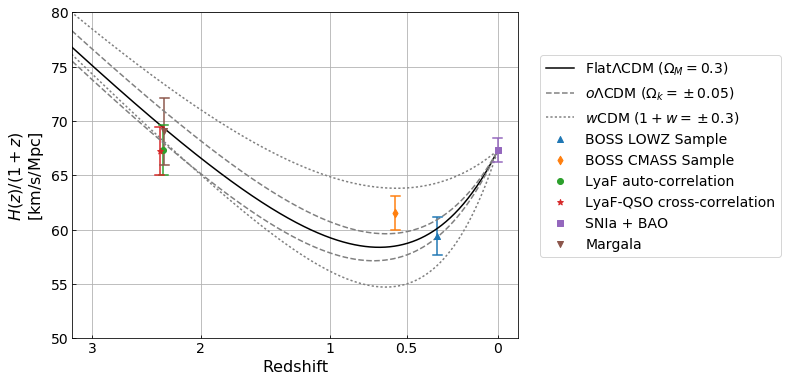

In [184]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_H(ax)
plot_H_constraints(ax)
              
ax.set_ylim(50, 80)

ax.legend(loc=(1.05, .25))

plt.savefig('distance_constraints_H.png', dpi=100, bbox_inches='tight')

In [185]:
np.log(np.exp(1))

1.0

In [186]:
def plot_DM_constraints(ax):
    for constraint in bao_constraints:
        if 'D_M/r_d' in constraint and 'Combined' not in constraint['name']:
            z = constraint['z']


            def _to_y(D_M_over_rd):
                if z == 0:
                    return (const.c/(D_M_over_rd*rd)).to(u.km / u.s / u.Mpc)/(1 + z)
                return (const.c*np.log(1+z)/(D_M_over_rd*rd)).to(u.km / u.s / u.Mpc)

            value = _to_y(constraint['D_M/r_d']['value'])
            error = value * constraint['D_M/r_d']['error'] / constraint['D_M/r_d']['value']

            p = ax.scatter(np.sqrt(1 + z), value.value, label=constraint['name'], marker=constraint['marker'], zorder=9)
            color = p.get_facecolor()[0]
            ax.vlines(np.sqrt(1 + z), value.value-error.value, value.value+error.value, color=color)

            loc = ax.transLimits.transform((np.sqrt(1 + z), value.value-error.value))    
            ax.axhline(value.value-error.value, xmin=loc[0] - 0.01, xmax=loc[0] + 0.01, color=color)
            ax.axhline(value.value+error.value, xmin=loc[0] - 0.01, xmax=loc[0] + 0.01, color=color)

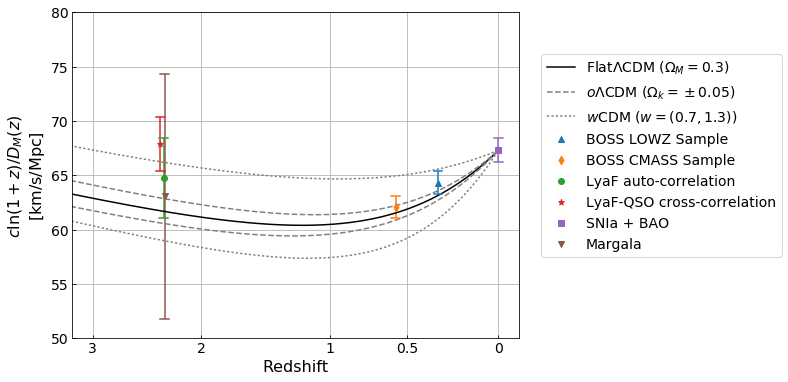

In [187]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_DM(ax, ylim=(50, 80))
plot_DM_constraints(ax)

ax.legend(loc=(1.05, .25))

plt.savefig('distance_constraints_DM.png', dpi=100, bbox_inches='tight')

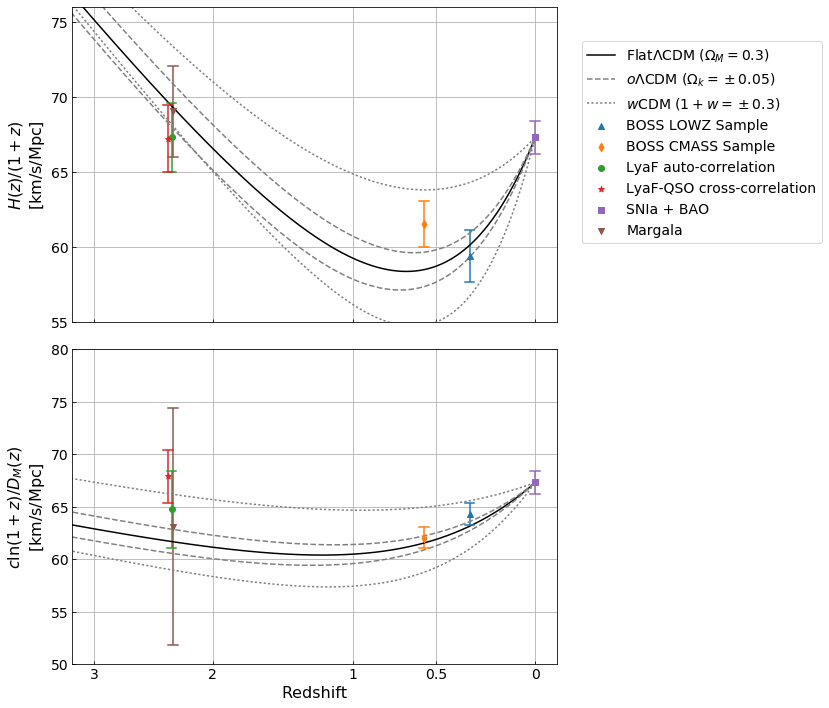

In [188]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 10), sharex=True)

plot_H(axes[0])
plot_H_constraints(axes[0])
axes[0].set_xlabel('')
axes[0].legend(loc=(1.05, .25))


plot_DM(axes[1], ylim=(50, 80))
plot_DM_constraints(axes[1])

plt.tight_layout()

plt.savefig('distance_constraints.png', dpi=100, bbox_inches='tight')